In [1]:
!pip install pandas_datareader

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from datetime import datetime
import datetime
import math
import scipy.stats as ss
import seaborn as sns; sns.set(color_codes=True)
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from math import sqrt

# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

In [3]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 1, 1)
df_shopify = web.DataReader('SHOP', 'yahoo', start, end) 
shop= df_shopify
shop=shop.reset_index()
shop['Date'] = pd.to_datetime(shop['Date'])

# corresponding csv file is saved in an ouput directory 
#df_amzn.to_csv('data/data.csv')
shop

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-05-20,17.000000,17.000000,17.000000,17.000000,0,17.000000
1,2015-05-21,28.740000,24.110001,28.000000,25.680000,12303900,25.680000
2,2015-05-22,31.100000,26.000000,26.070000,28.309999,2841200,28.309999
3,2015-05-26,30.340000,29.080000,29.799999,29.650000,820200,29.650000
4,2015-05-27,30.809999,27.000000,30.670000,27.500000,797600,27.500000
...,...,...,...,...,...,...,...
906,2018-12-24,122.870003,117.639999,118.949997,119.099998,1306000,119.099998
907,2018-12-26,130.550003,121.379997,121.379997,130.210007,1627300,130.210007
908,2018-12-27,132.600006,125.040001,126.440002,132.399994,1461100,132.399994
909,2018-12-28,136.130005,129.419998,134.119995,133.460007,1376500,133.460007


In [4]:
shop.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [5]:
shop.describe()

,High,Low,Open,Close,Volume,Adj Close
count,911.000000,911.000000,911.000000,911.000000,9.110000e+02,911.000000
mean,78.880096,75.597952,77.245402,77.287387,1.340385e+06,77.287387
std,48.453964,46.506867,47.452405,47.514276,1.542097e+06,47.514276
min,17.000000,17.000000,17.000000,17.000000,0.000000e+00,17.000000
25%,32.804501,31.355000,32.264999,31.999999,5.549000e+05,31.999999
50%,64.360001,62.500000,64.029999,63.830002,1.021700e+06,63.830002
75%,123.669998,118.400002,120.770000,120.230000,1.625450e+06,120.230000
max,176.598999,172.210007,174.839996,173.779999,2.089590e+07,173.779999


# Implementing Kalman model on Shopify dataset

In [6]:
def Kalman_Filter(Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = param0[0]
    T = param0[1]
    H = param0[2]
    Q = param0[3]
    # "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    KF_Dens = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
            Likelihood = np.sum(KF_Dens[1:-1])  
            return Likelihood

In [7]:
def Kalman_Smoother(params, Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]
    "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            # "Please fill this part."
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    
    
            u_smooth = np.zeros(S)
            P_smooth = np.zeros(S)
            u_smooth[S-1] = u_update[S-1]
            P_smooth[S-1] = P_update[S-1]    
    for  t in range(S-1,0,-1):
     
        u_smooth[t-1] = u_update[t] +P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]- T*u_update[t])
        P_smooth[t-1] = P_update[t] + (P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_update[t])/P_update[t]*T*P_update[t])
    
    u_smooth = u_smooth[0:-1]
    return u_smooth

In [8]:
shop['Typical_Price'] = shop[['High','Low','Close']].mean(axis=1)
shop['lrets'] = (np.log(shop.Close) - np.log(shop.Close.shift(1))) * 100.
shop.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
0,2015-05-20,17.000000,17.000000,17.000000,17.000000,0,17.000000,17.000000,NaN
1,2015-05-21,28.740000,24.110001,28.000000,25.680000,12303900,25.680000,26.176667,41.249915
2,2015-05-22,31.100000,26.000000,26.070000,28.309999,2841200,28.309999,28.470000,9.750259
3,2015-05-26,30.340000,29.080000,29.799999,29.650000,820200,29.650000,29.690000,4.624703
4,2015-05-27,30.809999,27.000000,30.670000,27.500000,797600,27.500000,28.436666,-7.527611


C:\Users\Siddhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 6
         Gradient evaluations: 1


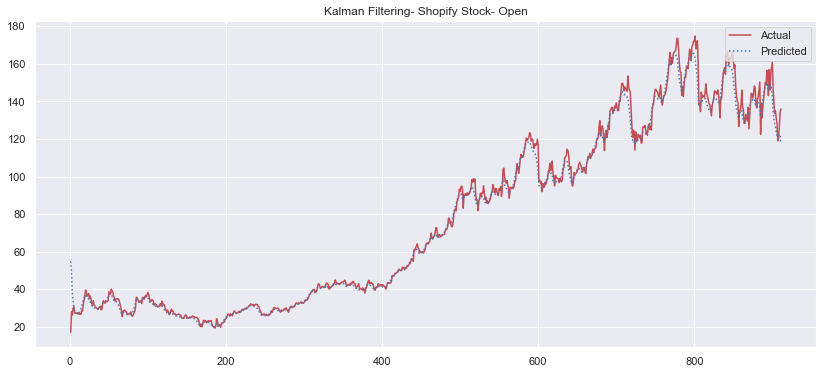

In [16]:
Y = shop['Open']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.9, 0.8, 1.1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, u,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filtering- Shopify Stock- Open")
plt.show()

C:\Users\Siddhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 6
         Gradient evaluations: 1


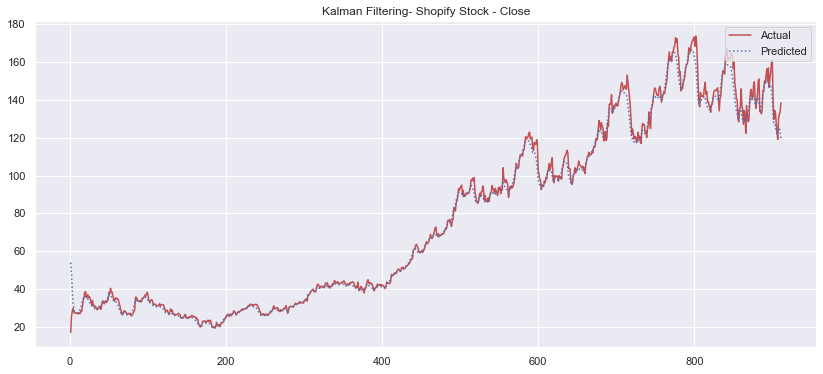

In [17]:
Y = shop['Close']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.9, 0.8, 1.1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, u,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filtering- Shopify Stock - Close")
plt.show()

In [12]:

results = pd.DataFrame({'Actual': list(Y),
                  'Predicted' : list(u),
                  'Date':shop['Date'],
                  'Open':shop['Open'],
                  'Close':shop['Close']
                       })

In [13]:

results.set_index('Date',inplace = True)
results.head(10)

,Actual,Predicted,Open,Close
Date,,,,
2015-05-20,17.000000,53.931496,17.000000,17.000000
2015-05-21,25.680000,48.604263,28.000000,25.680000
2015-05-22,28.309999,38.730163,26.070000,28.309999
2015-05-26,29.650000,32.964504,29.799999,29.650000
2015-05-27,27.500000,29.447224,30.670000,27.500000
2015-05-28,27.450001,28.111048,27.549999,27.450001
2015-05-29,27.200001,27.487183,27.250000,27.200001
2015-06-01,27.330000,27.308254,27.200001,27.330000
2015-06-02,26.950001,27.276702,27.469999,26.950001


In [14]:
dif = pd.DataFrame({'Actual':list(Y),
                     'Predicted':list(u)})

#### RMSE Value of Shopify

In [15]:
rms = sqrt(mean_squared_error(dif['Actual'],dif['Predicted']))
rms

3.5412598855655055